Breast_Cancer_Prediction

Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree,export_text
from sklearn import tree

Data Preprocessing and Data Cleaning

In [2]:
df=pd.read_csv('Final_dataset.csv')
df.head()

,Unnamed: 0,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,NUGGC,TSPYL1,SPANXN3,TRIM64B,PNRC2,C22orf43,AL450307.1,GJB5,Tissue,Metastasis
0,0,0.93,0.0,0.00,5.78,2.83,4.80,1.37,21.92,34.16,...,31.82,92.08,0.0,0.0,9.57,0.00,0.0,0.22,0,1
1,1,1.97,0.0,0.43,5.17,6.26,1.83,1.78,10.48,25.12,...,19.04,80.04,0.0,0.0,5.24,0.36,0.0,1.97,0,1
2,2,0.00,0.0,0.00,8.76,3.37,0.00,0.00,0.00,21.77,...,19.94,311.52,0.0,0.0,116.07,0.00,0.0,0.00,0,1
3,3,5.45,0.0,3.43,4.58,6.24,4.23,2.59,23.78,16.48,...,9.14,44.29,0.0,0.0,8.69,1.23,0.0,3.34,0,0
4,4,4.52,0.0,8.45,7.20,5.16,15.87,9.21,14.95,18.19,...,10.19,26.13,0.0,0.0,45.15,0.94,0.0,0.33,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 16386 entries, Unnamed: 0 to Metastasis
dtypes: float64(16363), int64(23)
memory usage: 7.5 MB


In [4]:
df.rename(columns={'Unnamed: 0':'ID'},inplace=True)
df.drop(columns=['ID'],inplace=True)
df.describe()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,NUGGC,TSPYL1,SPANXN3,TRIM64B,PNRC2,C22orf43,AL450307.1,GJB5,Tissue,Metastasis
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,7.074167,0.772167,6.262333,6.539167,8.716500,8.635667,13.293500,14.495667,23.643000,15.238833,...,8.637833,37.932000,0.137833,0.887833,23.964833,0.833167,0.633333,3.846000,0.500000,0.500000
std,3.588167,2.008150,4.115703,2.764997,4.673445,6.728820,13.596998,7.748925,21.896341,10.484310,...,7.747377,38.067764,0.669024,2.967423,18.106393,0.881256,2.766420,5.457683,0.504219,0.504219
min,0.000000,0.000000,0.000000,0.230000,0.390000,0.000000,0.000000,0.000000,0.430000,0.000000,...,1.170000,16.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.757500,0.000000,3.722500,4.760000,5.370000,4.472500,5.825000,10.317500,16.462500,8.295000,...,4.985000,26.445000,0.000000,0.000000,14.237500,0.340000,0.000000,0.575000,0.000000,0.000000
50%,6.580000,0.200000,6.265000,5.960000,7.475000,7.665000,9.600000,14.225000,20.530000,13.260000,...,7.025000,31.615000,0.000000,0.000000,19.175000,0.600000,0.000000,1.385000,0.500000,0.500000
75%,9.425000,0.490000,8.547500,8.112500,11.300000,11.165000,15.527500,17.710000,25.007500,19.242500,...,9.205000,37.245000,0.000000,0.000000,28.145000,1.092500,0.000000,4.557500,1.000000,1.000000
max,15.730000,11.430000,19.280000,15.580000,23.320000,40.130000,91.760000,37.540000,180.590000,47.840000,...,53.230000,311.520000,3.930000,15.250000,116.070000,5.020000,19.950000,27.600000,1.000000,1.000000


In [5]:
df['Tissue'].value_counts()

Tissue
0    30
1    30
Name: count, dtype: int64

In [6]:
corr_matrix = df.corr()
species_corr = corr_matrix['Tissue'].drop('Tissue')
top_5_abs_corr = species_corr.abs().sort_values(ascending=False).head(5)
top_5_corr = species_corr[top_5_abs_corr.index]
print("Top 5 features with highest absolute correlation with 'Tissues':")
print(top_5_corr)

Top 5 features with highest absolute correlation with 'Tissues':
CDRT1      0.915151
TMEM236    0.892436
ZNF223     0.885301
ZNF788     0.882895
SOX7       0.881585
Name: Tissue, dtype: float64


In [7]:
top_5_abs_corr = species_corr.abs().sort_values(ascending=False).head(1000)
top_5_corr = species_corr[top_5_abs_corr.index]
print("Top 5 features with highest absolute correlation with 'Tissues':")
print(top_5_corr)

Top 5 features with highest absolute correlation with 'Tissues':
CDRT1      0.915151
TMEM236    0.892436
ZNF223     0.885301
ZNF788     0.882895
SOX7       0.881585
             ...   
TRAM1     -0.507962
RBBP8NL   -0.507885
LEPREL1    0.507758
SRSF5      0.507586
MAPKAP1   -0.507551
Name: Tissue, Length: 1000, dtype: float64


In [8]:
top_5_neg_corr = species_corr.sort_values().head(5)

print("Top 5 features with the highest negative correlation with 'Tissues':")
print(top_5_neg_corr)

Top 5 features with the highest negative correlation with 'Tissues':
MAZ      -0.726966
FLAD1    -0.721774
H2AFZ    -0.718153
PAQR4    -0.717874
LRRC45   -0.717241
Name: Tissue, dtype: float64


EDA

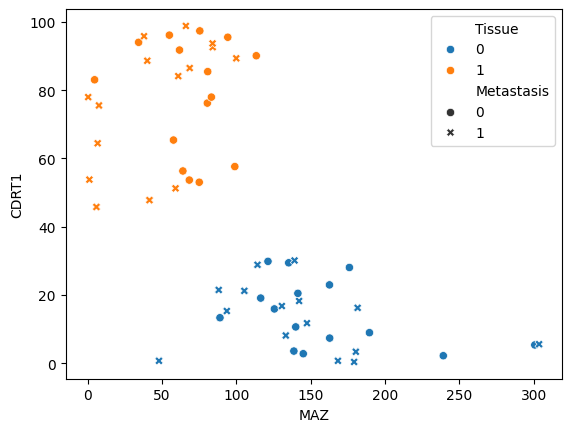

In [9]:
sns.scatterplot(x='MAZ',y='CDRT1',data=df,hue='Tissue',style='Metastasis')
plt.savefig('Scatterplot.png')
plt.show()

C:\Users\amani\AppData\Local\Temp\ipykernel_4700\1722882942.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MAZ'])


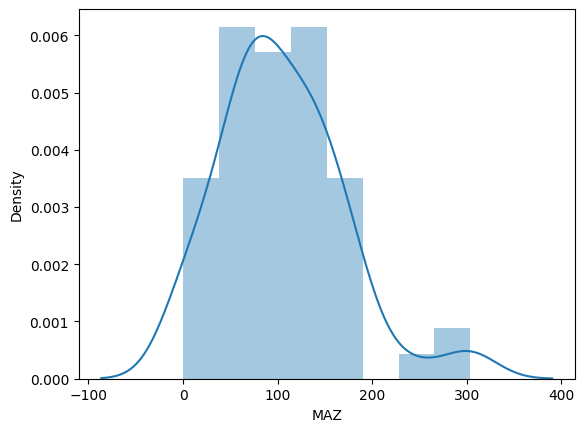

In [10]:
sns.distplot(df['MAZ'])
plt.savefig('Dist_MAZ')

C:\Users\amani\AppData\Local\Temp\ipykernel_4700\3941406112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CDRT1'])


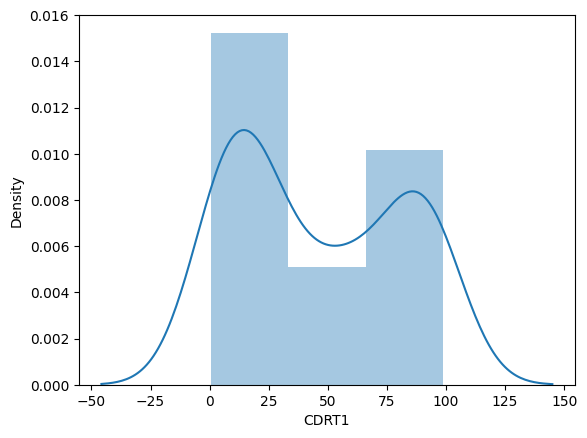

In [11]:
sns.distplot(df['CDRT1'])
plt.savefig('Dist_CDRT1')

In [12]:
X=df.drop(columns='Tissue',axis=1).values
y=df['Tissue'].values

Train_Test_Split

In [13]:
X=StandardScaler().fit_transform(X)
X[0:1]

array([[-1.72679189, -0.38776143, -1.53441123, ..., -0.23086805,
        -0.66999127,  1.        ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training and Testing

In [15]:
LR=LogisticRegression(solver='liblinear')
LR.fit(X_train,y_train)
yhat=LR.predict(X_test)
print('F1 accuracy score is:',f1_score(y_test,yhat))
print("f1 Accuracy cross val score:",np.mean(cross_val_score(LR,X_train,y_train,scoring='f1',cv=10)))
print('accuracy score is:',accuracy_score(y_test,yhat))
print("Accuracy cross val score:",np.mean(cross_val_score(LR,X_train,y_train,scoring='accuracy',cv=10)))
print('Logloss score is:',log_loss(y_test,LR.predict_proba(X_test)))

F1 accuracy score is: 0.9333333333333333
f1 Accuracy cross val score: 0.9666666666666666
accuracy score is: 0.9166666666666666
Accuracy cross val score: 0.9800000000000001
Logloss score is: 0.08574716526618366


Neural Networks

Epoch 1/40


C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.5735 - loss: 39.3884 - val_accuracy: 0.8000 - val_loss: 36.8257
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7133 - loss: 38.2189 - val_accuracy: 1.0000 - val_loss: 35.1080
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6573 - loss: 37.2488 - val_accuracy: 0.9000 - val_loss: 33.7290
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7692 - loss: 34.9926 - val_accuracy: 0.9000 - val_loss: 32.4475
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7308 - loss: 34.3483 - val_accuracy: 1.0000 - val_loss: 31.2395
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7763 - loss: 33.0198 - val_accuracy: 1.0000 - val_loss: 30.0739
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6606 - loss: 33.1333 - val_accuracy: 1.0000 - val_loss: 29.0826
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7692 - loss: 31.3836 - val_accuracy: 1.0000 - val_loss: 28

C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.5000 - loss: 39.1719 - val_accuracy: 0.9000 - val_loss: 36.6665
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5351 - loss: 37.9047 - val_accuracy: 0.7000 - val_loss: 35.1454
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7412 - loss: 35.9176 - val_accuracy: 0.7000 - val_loss: 33.8575
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6853 - loss: 35.5087 - val_accuracy: 0.7000 - val_loss: 32.7790
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7029 - loss: 34.8783 - val_accuracy: 0.7000 - val_loss: 31.7634
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7692 - loss: 33.0974 - val_accuracy: 0.7000 - val_loss: 30.6935
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8427 - loss: 31.0018 - val_accuracy: 0.8000 - val_loss: 29.5758
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7412 - loss: 30.2790 - val_accuracy: 0.9000 - val_loss: 28

C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.3394 - loss: 39.3830 - val_accuracy: 0.8000 - val_loss: 36.7616
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5455 - loss: 40.1814 - val_accuracy: 0.8000 - val_loss: 35.4093
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6573 - loss: 37.1078 - val_accuracy: 0.7000 - val_loss: 34.2854
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7588 - loss: 39.1097 - val_accuracy: 0.7000 - val_loss: 33.3632
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7204 - loss: 37.0635 - val_accuracy: 0.7000 - val_loss: 32.5282
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7133 - loss: 33.2594 - val_accuracy: 0.7000 - val_loss: 31.5480
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7029 - loss: 32.1319 - val_accuracy: 0.7000 - val_loss: 30.5202
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8147 - loss: 29.8452 - val_accuracy: 0.7000 - val_loss: 2

C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.4688 - loss: 39.3068 - val_accuracy: 0.8000 - val_loss: 36.8073
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7133 - loss: 37.3697 - val_accuracy: 0.8000 - val_loss: 34.8706
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8147 - loss: 36.5179 - val_accuracy: 0.8000 - val_loss: 33.3556
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8251 - loss: 32.9737 - val_accuracy: 0.8000 - val_loss: 31.9273
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8427 - loss: 33.0755 - val_accuracy: 0.8000 - val_loss: 30.7958
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7588 - loss: 31.8158 - val_accuracy: 0.8000 - val_loss: 29.8421
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7971 - loss: 30.4165 - val_accuracy: 0.8000 - val_loss: 28.9509
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7763 - loss: 29.5451 - val_accuracy: 0.8000 - v

C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.3777 - loss: 39.8454 - val_accuracy: 0.9000 - val_loss: 36.8094
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5839 - loss: 40.1262 - val_accuracy: 0.8000 - val_loss: 35.2045
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5384 - loss: 37.2923 - val_accuracy: 0.8000 - val_loss: 33.7175
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5351 - loss: 38.2548 - val_accuracy: 0.9000 - val_loss: 32.3670
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6749 - loss: 34.5516 - val_accuracy: 0.9000 - val_loss: 31.1272
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7029 - loss: 33.4829 - val_accuracy: 0.9000 - val_loss: 30.0113
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7867 - loss: 31.2611 - val_accuracy: 0.9000 - val_loss: 28.9911
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6086 - loss: 32.0025 - val_accuracy: 0.9000 - val_loss: 28

C:\Users\amani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5247 - loss: 38.9180 - val_accuracy: 0.7000 - val_loss: 36.1466
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7588 - loss: 36.7627 - val_accuracy: 0.9000 - val_loss: 33.6095
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6365 - loss: 34.8564 - val_accuracy: 0.9000 - val_loss: 31.6727
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8180 - loss: 32.8262 - val_accuracy: 0.9000 - val_loss: 29.9687
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6782 - loss: 34.4367 - val_accuracy: 0.8000 - val_loss: 28.8200
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7763 - loss: 32.6400 - val_accuracy: 0.7000 - val_loss: 27.8953
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7588 - loss: 30.0341 - val_accuracy: 0.7000 - val_loss: 27.0318
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7971 - loss: 32.2325 - val_accuracy: 0.7000 - val_loss: 26

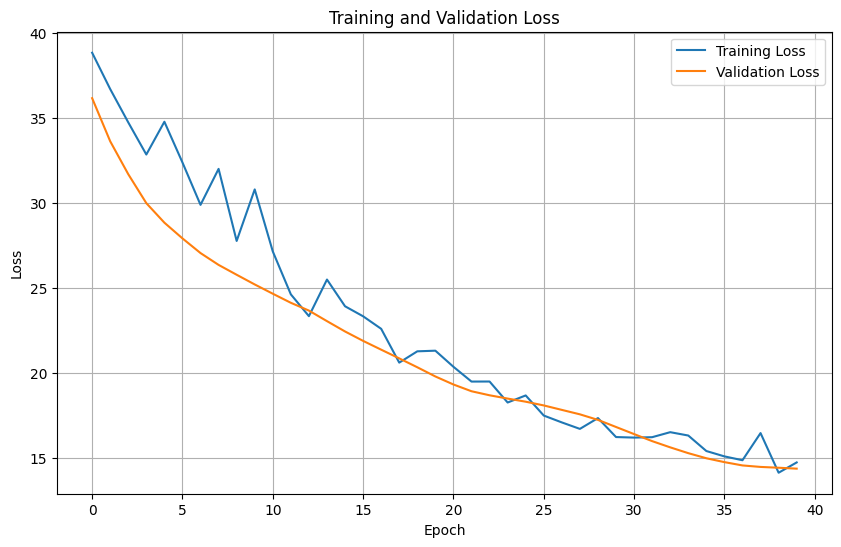

In [19]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assume X and y are already defined and loaded with your data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Neural Network with additional layers and regularization
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.1), input_shape=(input_shape,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.1)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.1)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = create_model(X_train.shape[1])
    
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
history = model.fit(X_train, y_train, epochs=40, batch_size=32, 
                        validation_split=0.2, verbose=1,
                        callbacks=[early_stopping])

# Stratified K-Fold to maintain class distribution
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
nn_scores = []
f1_scores = []
train_losses = []
val_losses = []

for train_index, test_index in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = create_model(X_train.shape[1])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=40, batch_size=32, 
                        validation_split=0.2, verbose=1,
                        callbacks=[early_stopping])
    
    y_pred = (predict(model, X_test) > 0.5).numpy().astype("int32")
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    nn_scores.append(accuracy)
    f1_scores.append(f1)
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Calculate and print mean accuracy and F1 score
mean_accuracy = np.mean(nn_scores)
mean_f1 = np.mean(f1_scores)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean F1 Score: {mean_f1}')

# Plot training vs. validation loss (only for the last fold)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('training_validation_loss.png')
plt.show()
